In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load dữ liệu
X_train_lsa = np.load('../../data_use/lsa/X_train_lsa.npy')
X_train_pca = np.load('../../data_use/pca/X_train_pca.npy')
y_train = np.load('../../data_use/tf_idf/y_train.npy', allow_pickle=True)

with open('../../data_use/lsa/lsa_model.pkl', 'rb') as f:
    lsa = pickle.load(f)
with open('../../data_use/pca/pca_model.pkl', 'rb') as f:
    pca = pickle.load(f)

print("\nĐã tải dữ liệu và models.")


Đã tải dữ liệu và models.


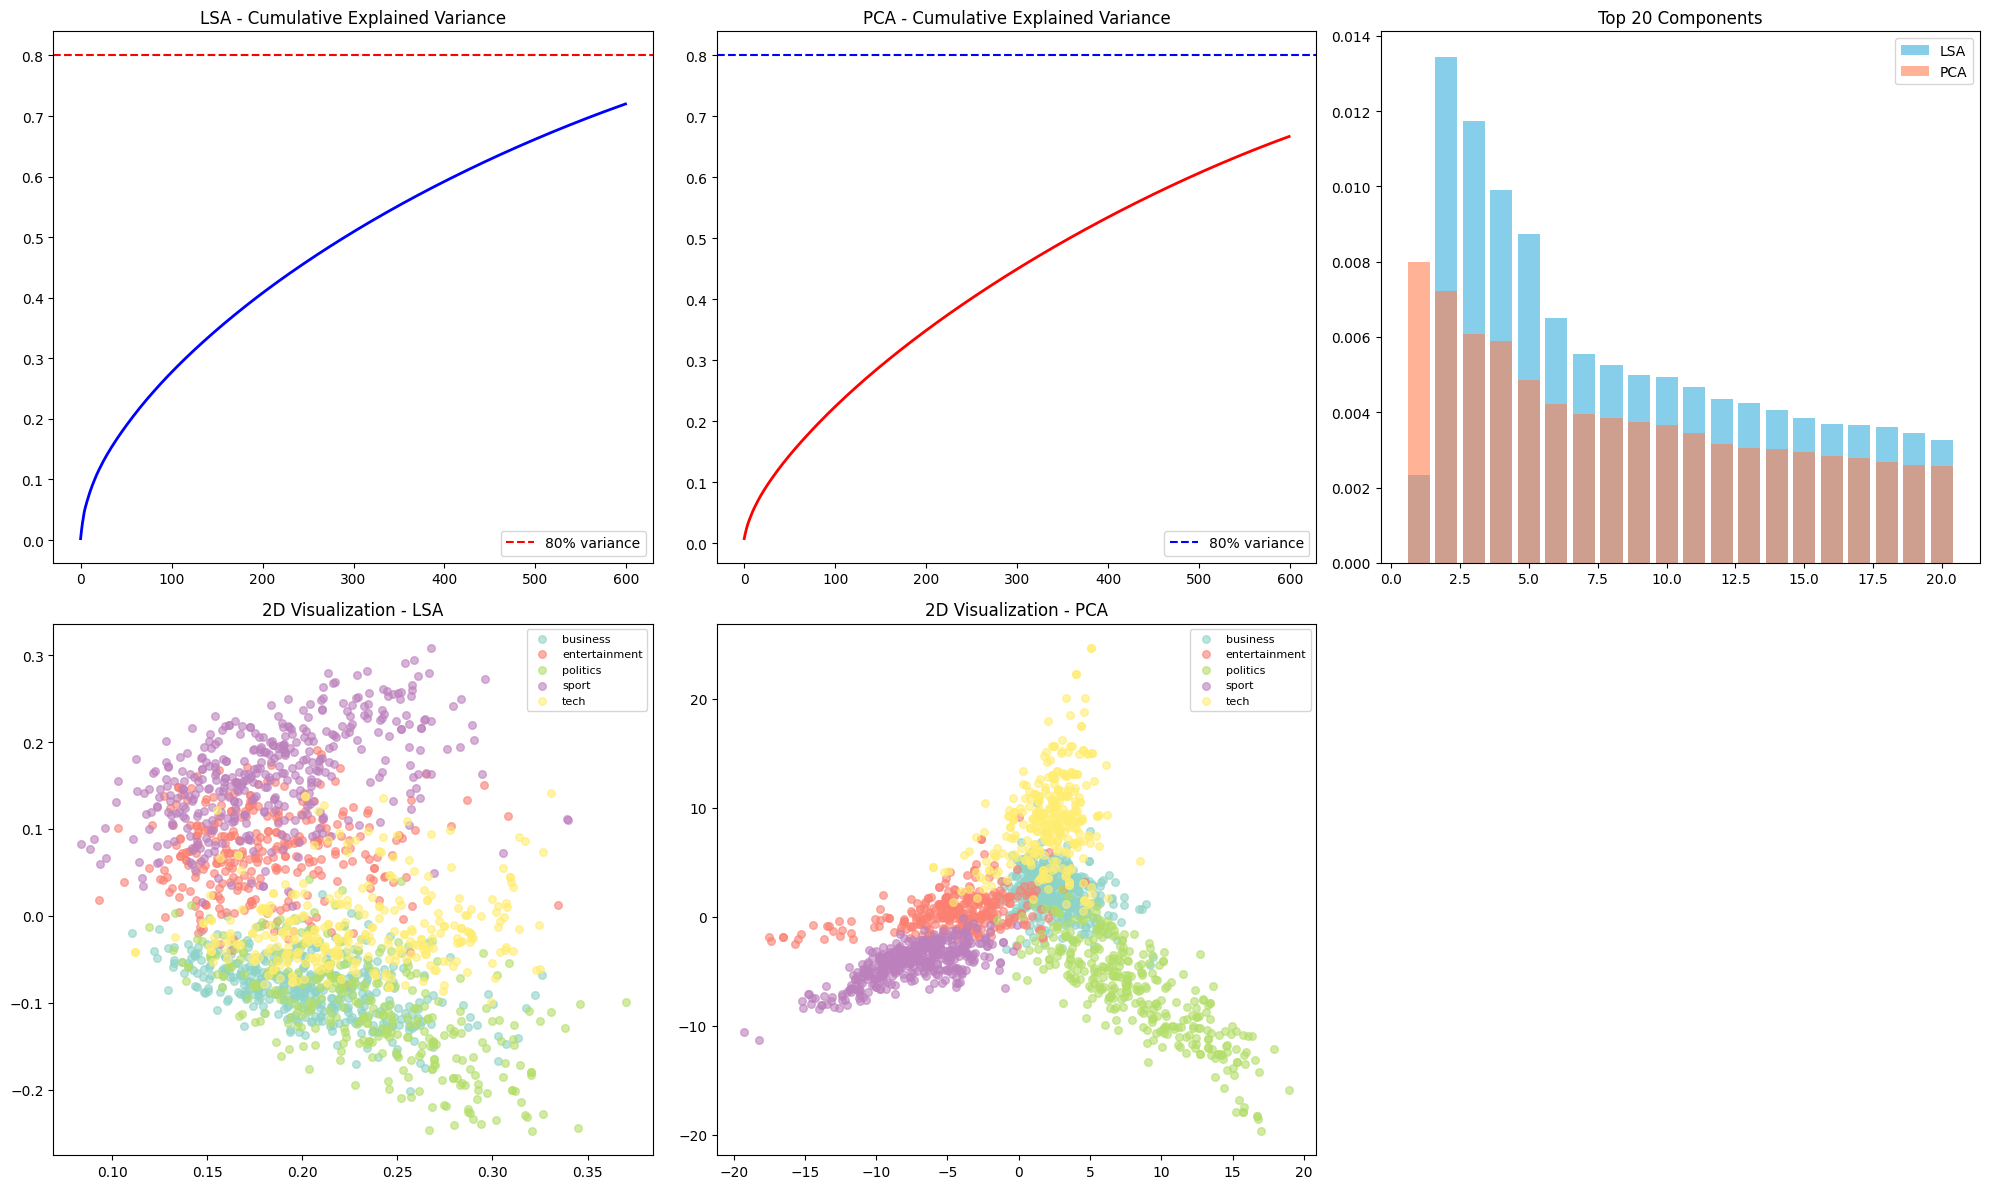


Đã lưu hình: img/dimensionality_reduction_analysis.png


In [2]:
unique_labels = np.unique(y_train)
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
label_to_color = dict(zip(unique_labels, colors))

# Visualization grid
fig = plt.figure(figsize=(20, 12))

# 1. LSA cumulative explained variance
ax1 = plt.subplot(2, 3, 1)
ax1.plot(np.cumsum(lsa.explained_variance_ratio_), 'b-', linewidth=2)
ax1.axhline(0.8, color='r', linestyle='--', label='80% variance')
ax1.set_title('LSA - Cumulative Explained Variance')
ax1.legend()

# 2. PCA cumulative explained variance
ax2 = plt.subplot(2, 3, 2)
ax2.plot(np.cumsum(pca.explained_variance_ratio_), 'r-', linewidth=2)
ax2.axhline(0.8, color='b', linestyle='--', label='80% variance')
ax2.set_title('PCA - Cumulative Explained Variance')
ax2.legend()

# 3. Top 20 components
ax3 = plt.subplot(2, 3, 3)
ax3.bar(range(1, 21), lsa.explained_variance_ratio_[:20], color='skyblue', label='LSA')
ax3.bar(range(1, 21), pca.explained_variance_ratio_[:20], alpha=0.6, color='coral', label='PCA')
ax3.set_title('Top 20 Components')
ax3.legend()

# 4. Scatter LSA
ax4 = plt.subplot(2, 3, 4)
for label in unique_labels:
    mask = y_train == label
    ax4.scatter(X_train_lsa[mask, 0], X_train_lsa[mask, 1], 
                c=[label_to_color[label]], label=label, alpha=0.6, s=30)
ax4.set_title('2D Visualization - LSA')
ax4.legend(fontsize=8)

# 5. Scatter PCA
ax5 = plt.subplot(2, 3, 5)
for label in unique_labels:
    mask = y_train == label
    ax5.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], 
                c=[label_to_color[label]], label=label, alpha=0.6, s=30)
ax5.set_title('2D Visualization - PCA')
ax5.legend(fontsize=8)

plt.tight_layout()
plt.savefig('img/dimensionality_reduction_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nĐã lưu hình: img/dimensionality_reduction_analysis.png")